<a href="https://colab.research.google.com/github/abubakar1109/Learning-AI-ML/blob/main/Day6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("/letter-recognition.csv")

In [14]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [15]:
df.shape

(20000, 17)

Split Data

In [16]:
x=np.array(df)[:,1:16]
y=np.array(df.letter)[:]

In [17]:
x

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [18]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [20]:
x_train=x[0:16000,0:17]
x_test=x[16001:,:]
y_train=y[:16000]
y_test=y[16001:]

Build SVM Model

In [21]:
from sklearn import svm

model=svm.SVC(C=3)

In [22]:
model.fit(x_train,y_train)

SVC(C=3)

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [25]:
model.score(x_test,y_test)

0.927231807951988

In [26]:
y_grid=(np.column_stack([y_test,y_pred]))

In [27]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [28]:
import string
lab=list(string.ascii_uppercase[0:26])
plab=["Predicted"+s for s in lab]

In [30]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [29]:
plab

['PredictedA',
 'PredictedB',
 'PredictedC',
 'PredictedD',
 'PredictedE',
 'PredictedF',
 'PredictedG',
 'PredictedH',
 'PredictedI',
 'PredictedJ',
 'PredictedK',
 'PredictedL',
 'PredictedM',
 'PredictedN',
 'PredictedO',
 'PredictedP',
 'PredictedQ',
 'PredictedR',
 'PredictedS',
 'PredictedT',
 'PredictedU',
 'PredictedV',
 'PredictedW',
 'PredictedX',
 'PredictedY',
 'PredictedZ']

In [33]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test,y_pred,labels=lab)
df_cm=pd.DataFrame(cm,index=[i for i in lab],
                columns=[i for i in plab])

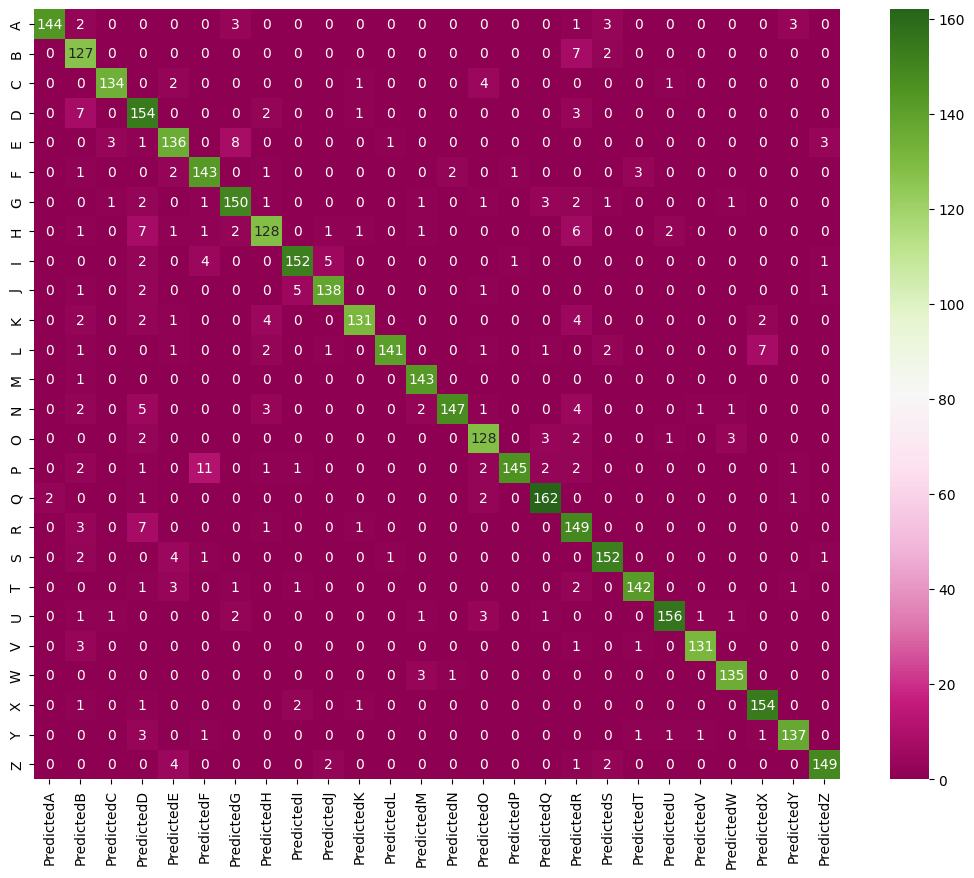

In [47]:
plt.figure(figsize=(13,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="PiYG")
plt.show()